In [1]:
%matplotlib notebook
%matplotlib notebook
import numpy as np
from numpy import pi, tan, cos, sin
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from matplotlib import animation
from matplotlib.pyplot import xlim, ylim

In [2]:
g=9.81; M=0.02; epsilon1, epsilon2 = 0.005, 0.003
a = 0.05 #amplitude de secou
k = 0.5 #raideur (N.m-1)

# position et vitesse initiale pour une expérience de lâcher
l0 = 0.6

theta0=0.5
thetap0=0.1
rho0 = 1 #rho = l/l0
rhop0 = 0

x0=np.array([theta0,thetap0, rho0, rhop0]) # les inconnus

# pulsation, fréquence et période d'oscillation du pendule
w1 = np.sqrt(k/M)
f1=w1/(2*pi)
T1=1/f1

w2 = np.sqrt(g/l0)
f2=w2/(2*pi)
T2=1/f1

w = (w1+w2)/2 #omega du secou
T = 2*pi/w


# définition de la durée de simulation
# Np périodes d'intégration pour la solution temporelle
# Ni point d'intégration par période
Np=5; Ni=40 #5 périodes avec 40 points à chaque fois ==> 200 points
Ninc=Np*Ni

# temps initial t0, final tf, pas de temps dt et vecteur temps de simulation
t0=0; tf=Np*T #pas de variation de la période ?
dt=T/Ni #ok
t_balayage = np.linspace(t0, tf, Ninc) # avec t_balayage2 = np.arange(t0, tf, dt) on n'atteint pas tf .. logique hein

In [3]:
def pendule_ressort(t, X, epsilon1, epsilon2, w1, w2, w, a, l0):
    λ = a*sin(w*t)
    dλ = a*w*cos(w*t)
    d2λ = -a*w**2*sin(w*t)
    x1, x2, x3, x4 = X
    dx1 = x2
    dx2 = (1/x3)*(sin(x1)*d2λ/l0-2*x4*x2-2*epsilon2*w2*x2-w2**2*sin(x1))
    dx3 = x4
    dx4 = (-cos(x1)/l0)*d2λ+x3*x2**2-2*epsilon1*w1*x4-w1**2*(x3-1)+w2**2*cos(x1)
    
    return [dx1, dx2, dx3, dx4]

In [4]:
sol=solve_ivp(pendule_ressort, [t0,tf], x0, method='RK45', args = (epsilon1, epsilon2, w1, w2, w, a, l0), t_eval=t_balayage)

<IPython.core.display.Javascript object>


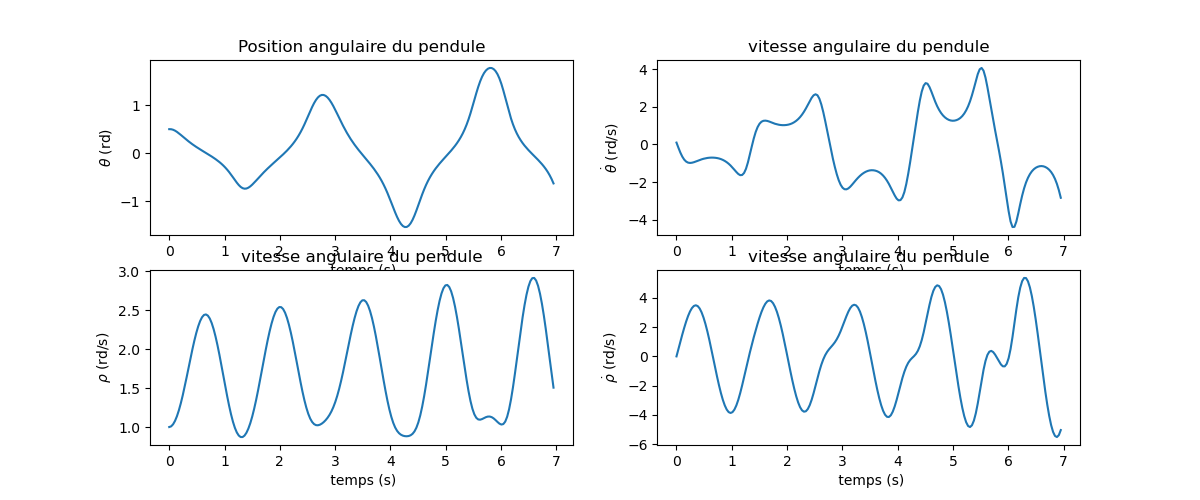

In [5]:
fig = plt.figure(figsize=(12, 5));
ax = fig.add_subplot(2,2,1);
ax.plot(sol.t,sol.y[0]);
ax.set_xlabel(' temps (s)')
ax.set_ylabel(r'$ \theta $ (rd)')
ax.set_title('Position angulaire du pendule')

bx = fig.add_subplot(2,2,2);
bx.set_xlabel(' temps (s)')
bx.set_ylabel(r'$ \dot\theta $ (rd/s)')
bx.set_title('vitesse angulaire du pendule')
bx.plot(sol.t,sol.y[1]);

cx = fig.add_subplot(2,2,3);
cx.set_xlabel(' temps (s)')
cx.set_ylabel(r'$ \rho $ (rd/s)')
cx.set_title('vitesse angulaire du pendule')
cx.plot(sol.t,sol.y[2]);

cx = fig.add_subplot(2,2,4);
cx.set_xlabel(' temps (s)')
cx.set_ylabel(r'$ \dot\rho $ (rd/s)')
cx.set_title('vitesse angulaire du pendule')
cx.plot(sol.t,sol.y[3]);

<IPython.core.display.Javascript object>


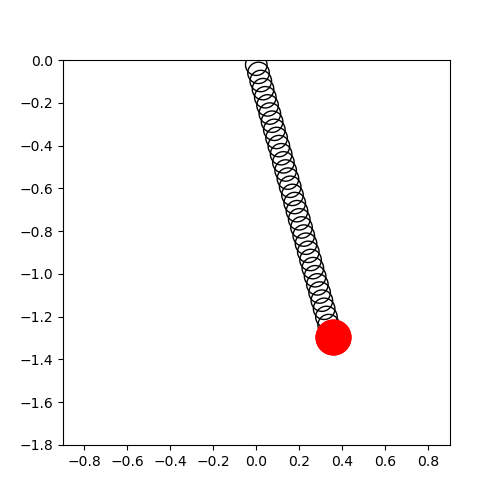

In [24]:
pos_x = l0*sol.y[2]*sin(sol.y[0])
pos_z = l0*sol.y[2]*cos(sol.y[0])

fig, ax = plt.subplots(figsize=(5, 5))
xlim([-l0*1.5, l0*1.5])
ylim([-l0*2*1.5, 0])

# créer la ligne qui ressemble à un ressort fixe
x_line = np.linspace(0, pos_x[0], 35)
y_line = a * np.sin(w * sol.t[0]) - np.linspace(0, pos_z[0], 35)
r = 0.05 # rayon des cercles qui simulent le ressort
circles = []
for i in range(len(x_line)):
    circle = plt.Circle((x_line[i], y_line[i]), r, fill=False)
    ax.add_artist(circle)
    circles.append(circle)

masse, = ax.plot([], [], 'ro', ms=25)

# fonction pour l'animation 
def anim_pendule(i):
    # mettre à jour la position de la ligne, de la masse, et des cercles
    x_line = np.linspace(0, pos_x[i], 35)
    y_line = a * np.sin(w * sol.t[i]) - np.linspace(0, pos_z[i], 35)
    line.set_data(x_line, y_line)
    x_masse = [pos_x[i], pos_x[i]]
    y_masse = [-pos_z[i], -pos_z[i]]
    masse.set_data(x_masse, y_masse)
    for j in range(len(circles)):
        circles[j].center = (x_line[j], y_line[j])
    return line, masse, circles

ninc = len(pos_x)

anim = animation.FuncAnimation(fig, anim_pendule, frames=ninc, interval=20, blit=True)
plt.show()
